#**Introduction to the Research Environment**

The research environment is powered by IPython notebooks, which allow one to perform a great deal of data analysis and statistical validation. We'll demonstrate a few simple techniques here.

##**Code Cells vs. Text Cells**

As you can see, each cell can be either code or text. To select between them, choose from the 'Cell Type' dropdown menu on the top left.

##**Executing a Command**

A code cell will be evaluated when you press play, or when you press the shortcut, shift-enter. Evaluating a cell evaluates each line of code in sequence, and prints the results of the last line below the cell.




In [ ]:
2+2
3+3

6

Sometimes there is no result to be printed, as is the case with assignment.

In [ ]:
X=2
Y=3

Remember that only the result from the last line is printed.

In [ ]:
4+5
5+9


14


However, you can print whichever lines you want using the print statement.

In [ ]:
print(5+5)
9+8

10


17

##**Knowing When a Cell is Running**
While a cell is running, a [*] will display on the left. When a cell has yet to be executed, [ ] will display. When it has been run, a number will display indicating the order in which it was run during the execution of the notebook [5]. Try on this cell and note it happening.

In [ ]:

#Take some time to run something
c = 0
for i in range(10000000):
    c = c + i
c

g= 0
for i in range(5000000):
  g = g + i
g

12499997500000

##**Importing Libraries**
The vast majority of the time, you'll want to use functions from pre-built libraries. You can't import every library on Quantopian due to security issues, but you can import most of the common scientific ones. Here I import numpy and pandas, the two most common and useful libraries in quant finance. I recommend copying this import statement to every new notebook.

Notice that you can rename libraries to whatever you want after importing. The as statement allows this. Here we use np and pd as aliases for numpy and pandas. This is a very common aliasing and will be found in most code snippets around the web. The point behind this is to allow you to type fewer characters when you are frequently accessing these libraries.

In [9]:
import numpy as np
import pandas as pd

# This is a plotting library for pretty pictures.
import matplotlib.pyplot as plt

##**Tab Autocomplete**
Pressing tab will give you a list of IPython's best guesses for what you might want to type next. This is incredibly valuable and will save you a lot of time. If there is only one possible option for what you could type next, IPython will fill that in for you. Try pressing tab very frequently, it will seldom fill in anything you don't want, as if there is ambiguity a list will be shown. This is a great way to see what functions are available in a library.

Try placing your cursor after the . and pressing tab.

In [ ]:
np.random.

##**Getting Documentation Help**
Placing a question mark after a function and executing that line of code will give you the documentation IPython has for that function. It's often best to do this in a new cell, as you avoid re-executing other code and running into bugs.

In [7]:
np.random.normal?
np.abs.accumulate?

Object `np.random.normal` not found.
Object `np.abs.accumulate` not found.



##**Sampling**
We'll sample some random data using a function from numpy.

In [ ]:
# Sample 100 points with a mean of 0 and an std of 1. This is a standard normal distribution.
X = np.random.normal(0, 1, 100)

In [ ]:
Y = np.random.normal(0, 1, 100)

##**Plotting**
We can use the plotting library we imported as follows.

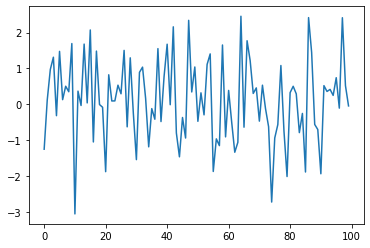

In [ ]:

plt.plot(X)

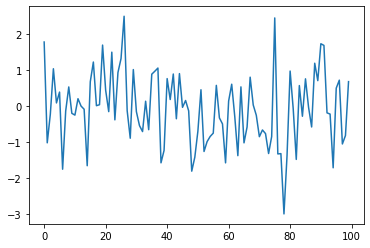

In [ ]:

plt.plot(Y)

##**Squelching Line Output**
You might have noticed the annoying line of the form [<matplotlib.lines.Line2D at 0x7f72fdbc1710>] before the plots. This is because the .plot function actually produces output. Sometimes we wish not to display output, we can accomplish this with the semi-colon as follows.

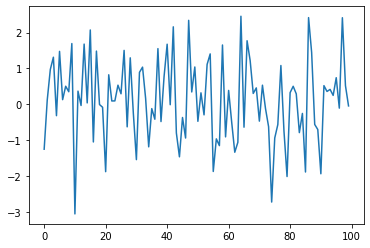

In [ ]:
plt.plot(X);

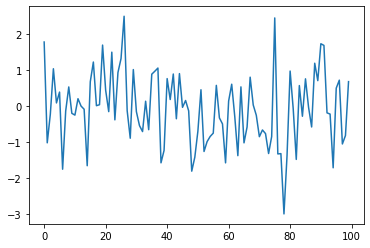

In [ ]:
plt.plot(Y);


##**Adding Axis Labels**
No self-respecting quant leaves a graph without labeled axes. Here are some commands to help with that.

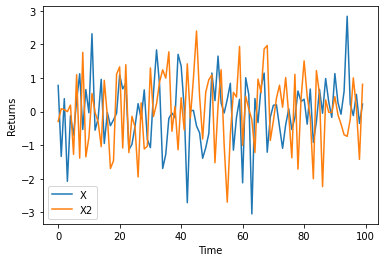

In [ ]:
X = np.random.normal(0, 1, 100)
X2 = np.random.normal(0, 1, 100)

plt.plot(X);
plt.plot(X2);
plt.xlabel('Time') # The data we generated is unitless, but don't forget units in general.
plt.ylabel('Returns')
plt.legend(['X', 'X2']);

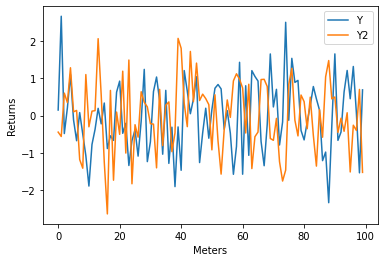

In [ ]:

Y = np.random.normal(0, 1, 100)
Y2 = np.random.normal(0, 1, 100)

plt.plot(Y);
plt.plot(Y2);
plt.xlabel('Meters')
plt.ylabel('Returns')
plt.legend(['Y', 'Y2']);

##**Generating Statistics**
Let's use numpy to take some simple statistics.

In [ ]:
np.mean(X)

-0.00040089975886149906

In [ ]:
np.std(X)

0.9520840889033855

In [ ]:
np.mean(Y)

-0.03148329883281706

In [ ]:
np.std(Y)

0.9622360389050597


##**Getting Real Pricing Data**
Randomly sampled data can be great for testing ideas, but let's get some real data. We can use get_pricing to do that. You can use the ? syntax as discussed above to get more information on get_pricing's arguments.

>*Dado que no está la función get_pricing, se trajeron los datos con dos metodos:*
> + *Traidos desde drive, donde se usó la función **read_cvs**, agregando el modificador **index_col='Date'**, ya que sin este los datos quedan indexados por defecto con numeros desde 0 en adelante*.
> + *Traidos desde yahoo finance  con la funcion **get_data_yahoo** que viene en la libreria **pandas_datareader**, que un compañero de la clase expuso*. 

In [50]:
#ingresando los datos desde archivo de drive, no indexa los datos desde su fecha a menos que se agregue index_col='Date'
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BA.csv",index_col='Date') #datos de The Boeing Company
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-12,160.529999,189.850006,154.809998,154.839996,154.839996,31734400
2020-03-13,174.970001,178.279999,161.380005,170.199997,170.199997,21168500
2020-03-16,149.419998,151.000000,128.759995,129.610001,129.610001,26844400
2020-03-17,132.509995,134.960007,101.250000,124.139999,124.139999,54492200
2020-03-18,99.860001,107.849998,89.000000,101.889999,101.889999,61943200
...,...,...,...,...,...,...
2021-03-08,226.669998,229.889999,223.710007,224.029999,224.029999,13807100
2021-03-09,226.809998,234.059998,222.580002,230.610001,230.610001,20952300
2021-03-10,233.809998,246.800003,232.880005,245.339996,245.339996,27659800


In [49]:
pd.read_csv?


In [47]:
#mismos datos anteriores, traidos desde yahoo finance
import pandas_datareader as pdr
import datetime 
data = pdr.get_data_yahoo('BA', start= datetime.datetime(2020,3,12), end= datetime.datetime(2021,3,12))
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-12,189.850006,154.809998,160.529999,154.839996,31734400,154.839996
2020-03-13,178.279999,161.380005,174.970001,170.199997,21168500,170.199997
2020-03-16,151.000000,128.759995,149.419998,129.610001,26844400,129.610001
2020-03-17,134.960007,101.250000,132.509995,124.139999,54492200,124.139999
2020-03-18,107.849998,89.000000,99.860001,101.889999,61943200,101.889999
...,...,...,...,...,...,...
2021-03-08,229.889999,223.710007,226.669998,224.029999,13807100,224.029999
2021-03-09,234.059998,222.580002,226.809998,230.610001,20952300,230.610001
2021-03-10,246.800003,232.880005,233.809998,245.339996,27659800,245.339996


Our data is now a dataframe. You can see the datetime index and the colums with different pricing data.

In [51]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-12,160.529999,189.850006,154.809998,154.839996,154.839996,31734400
2020-03-13,174.970001,178.279999,161.380005,170.199997,170.199997,21168500
2020-03-16,149.419998,151.000000,128.759995,129.610001,129.610001,26844400
2020-03-17,132.509995,134.960007,101.250000,124.139999,124.139999,54492200
2020-03-18,99.860001,107.849998,89.000000,101.889999,101.889999,61943200
...,...,...,...,...,...,...
2021-03-08,226.669998,229.889999,223.710007,224.029999,224.029999,13807100
2021-03-09,226.809998,234.059998,222.580002,230.610001,230.610001,20952300
2021-03-10,233.809998,246.800003,232.880005,245.339996,245.339996,27659800


This is a pandas dataframe, so we can index in to just get price like this. For more info on pandas, please click here.

In [52]:
X = data['Open']
X

Date
2020-03-12    160.529999
2020-03-13    174.970001
2020-03-16    149.419998
2020-03-17    132.509995
2020-03-18     99.860001
                 ...    
2021-03-08    226.669998
2021-03-09    226.809998
2021-03-10    233.809998
2021-03-11    248.770004
2021-03-12    253.860001
Name: Open, Length: 253, dtype: float64

Because there is now also date information in our data, we provide two series to .plot. X.index gives us the datetime index, and X.values gives us the pricing values. These are used as the X and Y coordinates to make a graph.

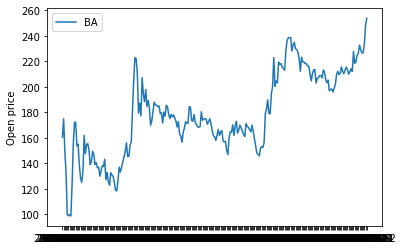

In [53]:
plt.plot(X.index, X.values)
plt.ylabel('Open price')
plt.legend(['BA']);

We can get statistics again on real data.

In [54]:
np.mean(X)

178.76794480632404

In [55]:
np.std(X)

32.116409171925916

##**Getting Returns from Prices**
We can use the pct_change function to get returns. Notice how we drop the first element after doing this, as it will be NaN (nothing -> something results in a NaN percent change).

In [56]:
R = X.pct_change()[1:]
R

Date
2020-03-13    0.089952
2020-03-16   -0.146025
2020-03-17   -0.113171
2020-03-18   -0.246396
2020-03-19   -0.010615
                ...   
2021-03-08   -0.010218
2021-03-09    0.000618
2021-03-10    0.030863
2021-03-11    0.063984
2021-03-12    0.020461
Name: Open, Length: 252, dtype: float64

We can plot the returns distribution as a histogram.

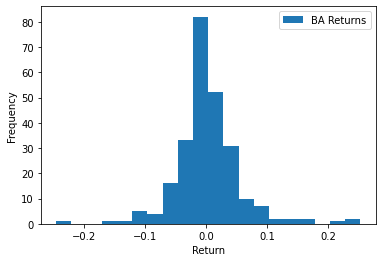

In [57]:
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['BA Returns']);

Get statistics again.

In [58]:
np.mean(R)

0.0032325013765804552

In [59]:
np.std(R)

0.05359102912834065

Now let's go backwards and generate data out of a normal distribution using the statistics we estimated from The Boeing Company's returns. We'll see that we have good reason to suspect The Boeing Company's returns may not be normal, as the resulting normal distribution looks far different.

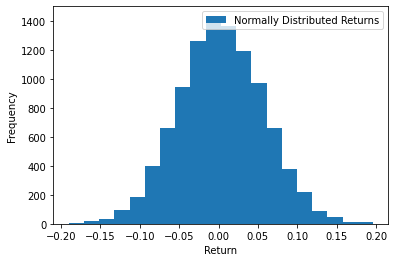

In [60]:
plt.hist(np.random.normal(np.mean(R), np.std(R), 10000), bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['Normally Distributed Returns']);

##**Generating a Moving Average**
pandas has some nice tools to allow us to generate rolling statistics. Here's an example. Notice how there's no moving average for the first 60 days, as we don't have 60 days of data on which to generate the statistic.

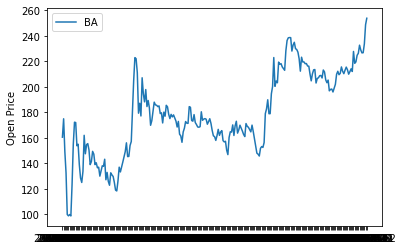

In [61]:
# Take the average of the last 60 days at each timepoint.
MAVG = X.rolling(60).mean()
plt.plot(X.index, X.values)
#plt.plot(MAVG.index, MAVG.values)
plt.ylabel('Open Price')
plt.legend(['BA', '60-day MAVG']);